# Advanced Machine Learning Midterm Assignment

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (10pts)

Text(0, 0.5, 'y')

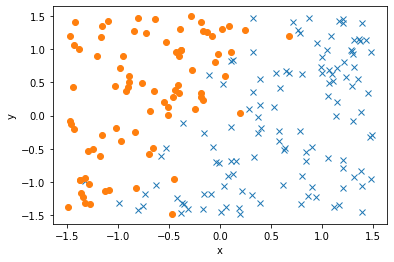

In [2]:
# Dataset IV
np.random.seed (1234)
n = 200
x = 3 * (np.random.rand (n, 4) - 0.5)
y = (2 * x [:,0] - 1 * x [:,1] + 0.5 + 0.5 * np.random.randn (n)) > 0
y = 2 * y - 1

plt.plot (np.extract (y>0, x[:,0]), np.extract (y>0, x[:,1]), 'x')
plt.plot (np.extract (y<0, x[:,0]), np.extract (y<0, x[:,1]), 'o')
plt.xlabel ('x')
plt.ylabel ('y')

### 1. Implement batch steepest gradient method

()


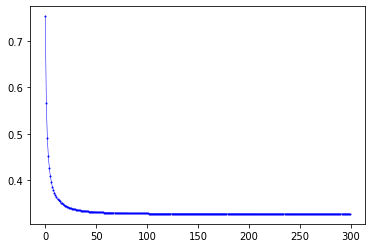

In [3]:
loss_hist_batch = []

iter_num = 300
w = np.ones (4)   # parameter vector
lam = 0.01        # learning rate
lip = 0.25 * max (x[:,0]**2)
steepest_w = []

for i in range (1, iter_num+1):
  posterior = 1 / (1 + np.exp (-y * np.dot (w, x.T)))
  #print (posterior.shape)
  direction = - 1 / n * np.sum ((1 - posterior) * y * x.T, axis=1) + 2 * lam * w
  #print (direction)
  j = 1 / n * np.sum (np.log (1 + np.exp (-y * np.dot (w, x.T)))) + lam * np.dot (w, w.T)
  steepest_w.append (w)
  loss_hist_batch.append (j)
  w = w - direction / np.sqrt (i) / lip

print (j.shape)
plt.plot (loss_hist_batch, 'bo-', linewidth=0.5, markersize=1)

### 2. Implement Newton based method

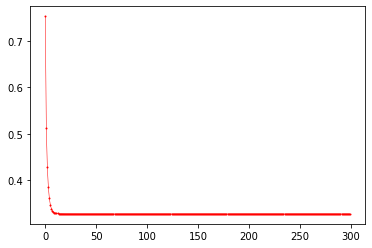

In [4]:
loss_hist_newton = []

w = np.ones (4)
lam = 0.01
newton_w = []

for i in range (iter_num):
  posterior = 1 / (1 + np.exp (-y * np.dot (w, x.T)))

  grad = - 1 / n * np.sum ((1 - posterior) * y * x.T, axis=1) + 2 * lam * w
  hess = 1 / n * np.dot (posterior * (1 - posterior) * x.T, x) + 2 * lam
  j = 1 / n * np.sum (np.log (1 + np.exp (-y * np.dot (w, x.T)))) + lam * np.dot (w, w.T)
  newton_w.append (w)
  loss_hist_newton.append (j)
  w = w - np.dot (np.linalg.pinv (hess), grad) / np.sqrt (i + 10)

#print (len(loss_hist_newton))
plt.plot (loss_hist_newton, 'ro-', linewidth=0.5, markersize=1)

### 3. Compare the performance above two methods

[]

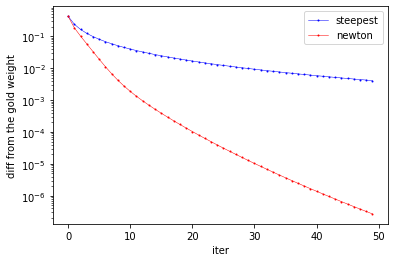

In [5]:
show_iter = 50

plt.plot (np.abs (loss_hist_batch[:show_iter] - min(loss_hist_batch)), 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot (np.abs (loss_hist_newton[:show_iter] - min(loss_hist_newton)), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend ()
plt.xlabel ('iter')
plt.ylabel ('diff from the gold weight')
plt.semilogy ()

### 4. Implement Newton and simple steepest gradient method for multiclass version of logistic regression

In [6]:
# Dataset V

n = 200
x = 3 * (np.random.randn (n, 3) - 0.5)
w = np.array ([[2, -1, 0.5],
                [-3, 2, 1],
                [1,  2, 3]])

y = np.argmax (np.dot (np.hstack ([x[:, :2], np.ones ((n, 1))]), w.T)
                         + 0.5 * np.random.randn (n, 3), axis=1)
#print (y.shape)

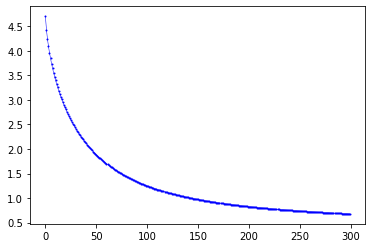

In [7]:
# steepest

iter_num = 300
lam = 0.01
lip = 0.25 * max (x[:,0]**2)
loss_hist_batch = []
steepest_w = []

for i in range (1, iter_num+1):
  posterior = 1 / (1 + np.exp (-y.T * np.dot (w, x.T)))
  # print (posterior.shape)
  direction = 1 / n * np.dot (-y.T * (1 - posterior), x) + 2 * lam * w
  # print (direction.shape)
  j = 1 / n * np.sum (np.log (1 + np.exp (-y.T * np.dot (w, x.T))), axis=1) + lam * np.dot (w, w.T)
  loss_hist_batch.append (j)
  w = w - direction / np.sqrt (i) / lip

loss_hist_batch00 = []
for i in range (iter_num):
  loss_hist_batch00.append (loss_hist_batch[i][0][0])

plt.plot (loss_hist_batch00, 'bo-', linewidth=0.5, markersize=1)

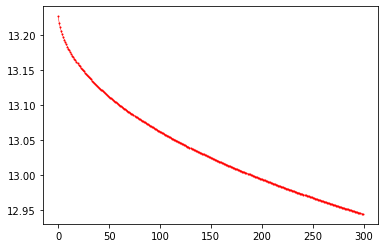

In [8]:
# newton

iter_num = 300
w = np.array ([[ 2, -1, 0.5],
                [-3, 2,   1],
                [ 1, 2,   3]])
loss_hist_newton = []
newton_w = []

for i in range (1, iter_num+1):
  posterior = 1 / (1 + np.exp (- y.T * np.dot (w, x.T)))
  grad = - 1 / n * np.dot (y.T * (1 - posterior), x) + 2 * lam * w
  hess = 1 / n * np.dot (np.dot (np.dot (posterior, (1 - posterior).T), x.T), x) + 2 * lam
  # print (hess.shape)
  j = 1 / n * np.sum (np.log (1 + np.exp (- y.T * np.dot (w, x.T)))) + lam * np.dot (w, w.T)
  loss_hist_newton.append (j)
  w = w + np.dot (np.linalg.inv (hess), grad) / np.sqrt (i)

loss_hist_newton00 = []
for i in range (iter_num):
  loss_hist_newton00.append (loss_hist_newton[i][0][0])

plt.plot (loss_hist_newton00, 'ro-', linewidth=0.5, markersize=1)

[]

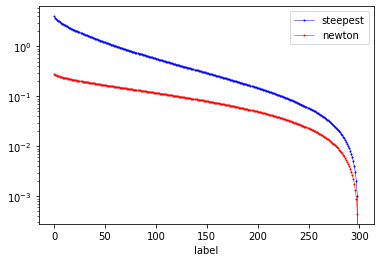

In [9]:
# compare the perfomance

show_iter = 300

plt.plot (np.abs (loss_hist_batch00[:show_iter] - min (loss_hist_batch00[:show_iter])), 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot (np.abs (loss_hist_newton00[:show_iter] - min (loss_hist_newton00[:show_iter])), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend ()
plt.xlabel ('label')
plt.semilogy ()